### Load DataFile Preprocessed

In [3]:
from data_prep import data_processing
import pandas as pd

# Load the dataset
filename = 'assessment.xlsx'
sheetname = 'Data'
data = data_processing(filename,sheetname)

pd.set_option('display.max_columns', None)
data.head()

/Users/nshukla/miniconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nshukla/miniconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,C_ID,IS_TD,IS_CASA,IS_FUNDS,IS_CC,IS_LOAN,Age_Group,C_EDU_Encoded,C_HSE_Encoded,C_OCC_Encoded,Total_CASA_Balance,Total_TD_Balance,Avg_CC_Transaction_Size,CC_Outstanding_to_Credit_Limit_Ratio,Assets_to_Product_Ratio,CASATD_Asset_Ratio,UT_Asset_Ratio,CC_Asset_Ratio,Loan_to_Asset_Ratio,NUM_PRD,C_seg
0,1443,1,1,1,1,0,4,3,2,2,0.494674,12.660331,0.000000,0.039221,0.457539,2.169925,0.000000,0.000000,0.0,3,0
1,1559,1,1,1,1,0,4,0,2,2,0.768132,14.649413,5.749972,2.953347,0.610026,2.807353,0.000000,0.039221,0.0,4,0
2,1913,1,1,1,1,0,4,0,0,2,0.240920,0.000000,3.798079,2.121063,0.367943,-0.883003,0.647409,0.048790,0.0,4,0
3,2032,1,1,1,0,0,4,0,0,1,0.341494,0.000000,0.000000,0.000000,0.347765,-0.575963,0.545428,0.000000,0.0,3,0
4,2048,1,1,1,0,0,4,0,2,1,0.563253,0.000000,0.000000,0.000000,0.372948,0.342299,0.202054,0.000000,0.0,4,0


### Train Tree Classifier for Affluent Customer , and Predict for Non-Affluent one

Product: CASA
Classification Report on Test Set (Affluent Customers):
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      2163
           1       0.79      0.76      0.77      2208

    accuracy                           0.78      4371
   macro avg       0.78      0.78      0.78      4371
weighted avg       0.78      0.78      0.78      4371



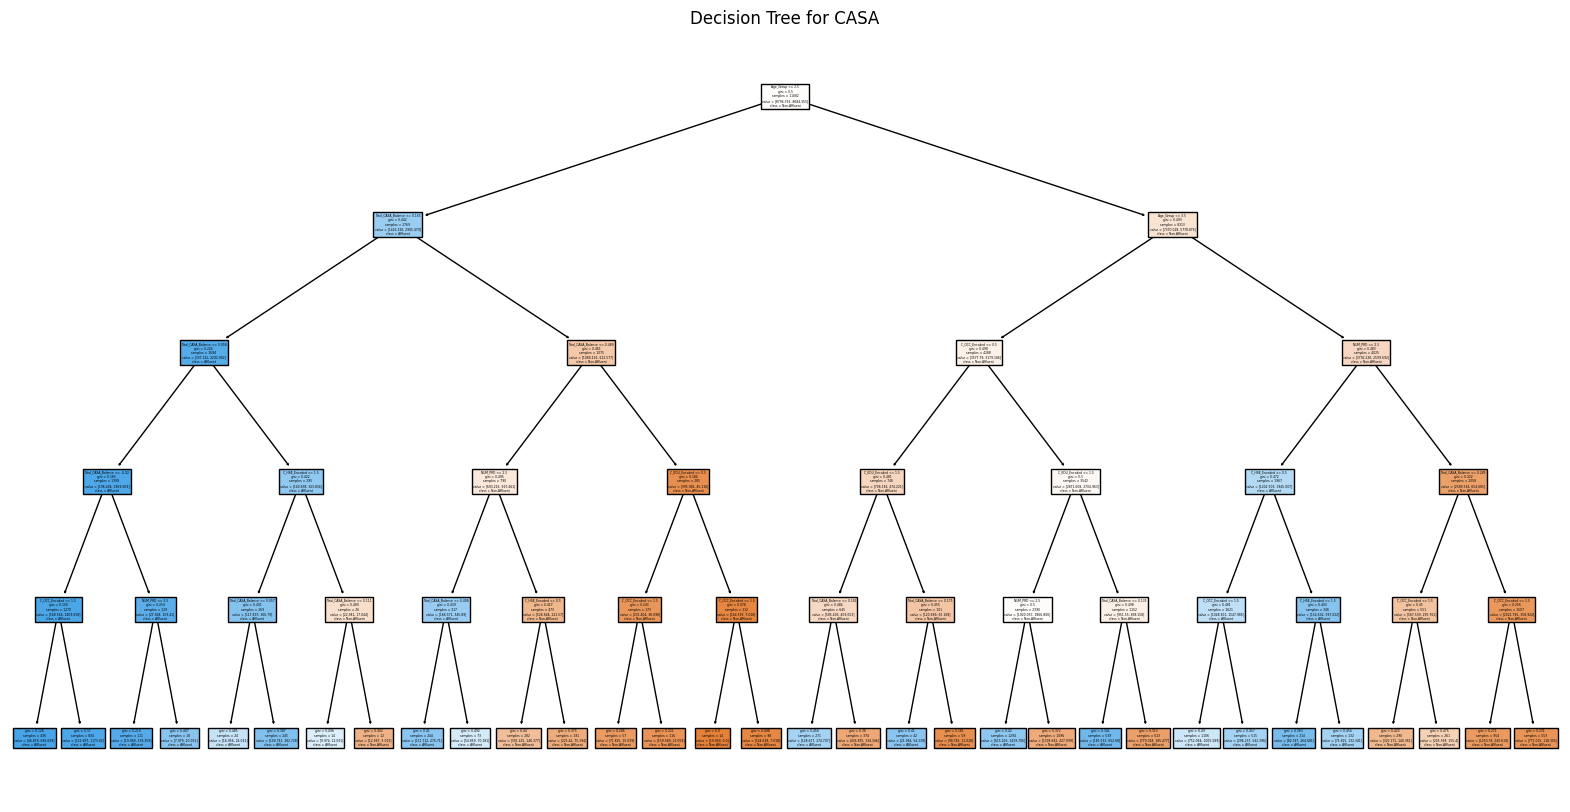

--------------------------------------------------
Product: TD
Classification Report on Test Set (Affluent Customers):
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      2163
           1       0.75      0.79      0.77      2208

    accuracy                           0.76      4371
   macro avg       0.76      0.76      0.76      4371
weighted avg       0.76      0.76      0.76      4371



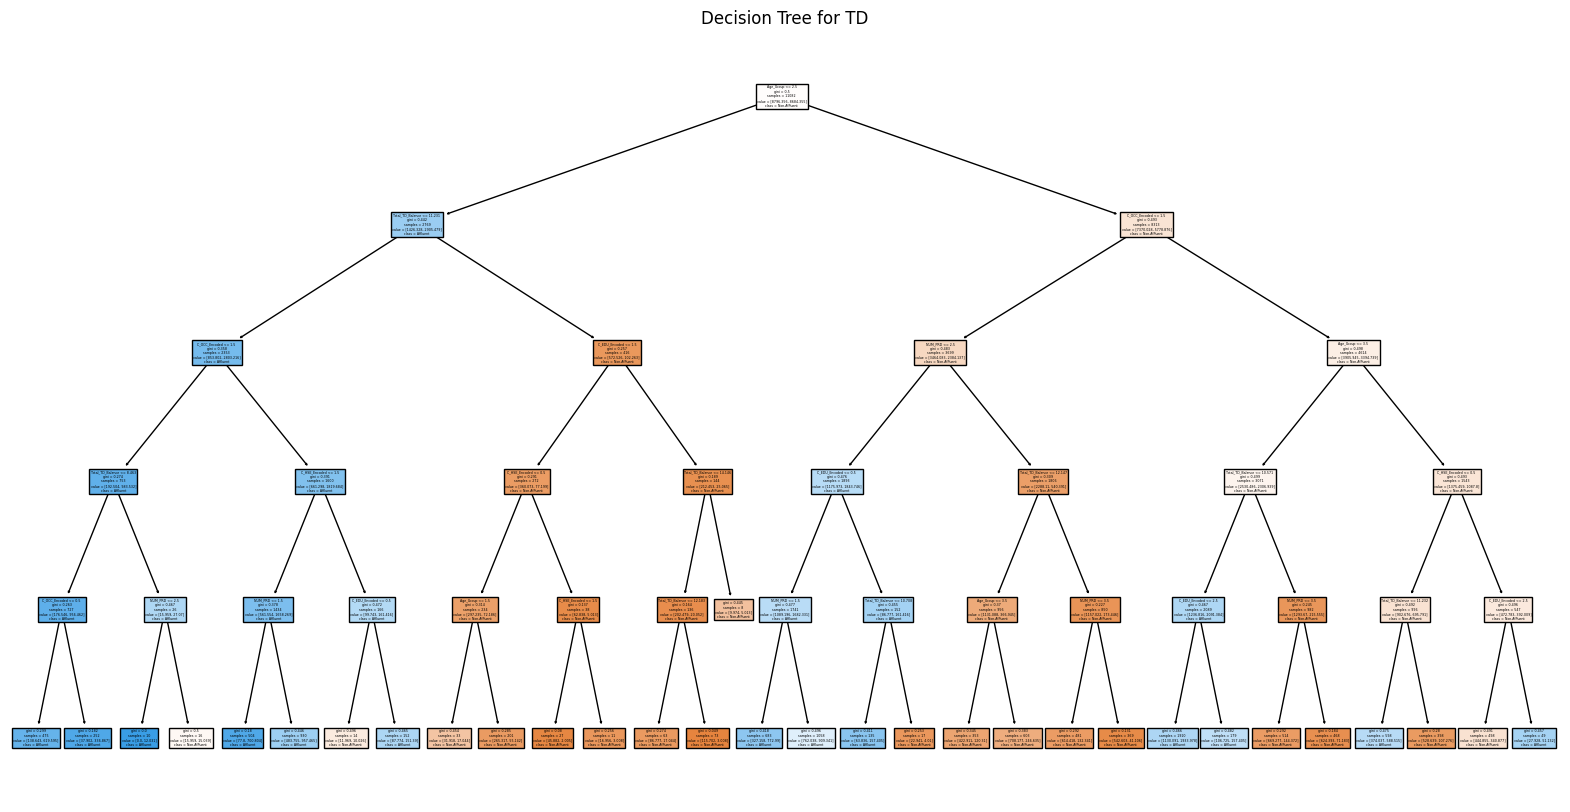

--------------------------------------------------
Product: CC
Classification Report on Test Set (Affluent Customers):
              precision    recall  f1-score   support

           0       0.77      0.92      0.83       477
           1       0.90      0.74      0.81       504

    accuracy                           0.82       981
   macro avg       0.83      0.83      0.82       981
weighted avg       0.84      0.82      0.82       981



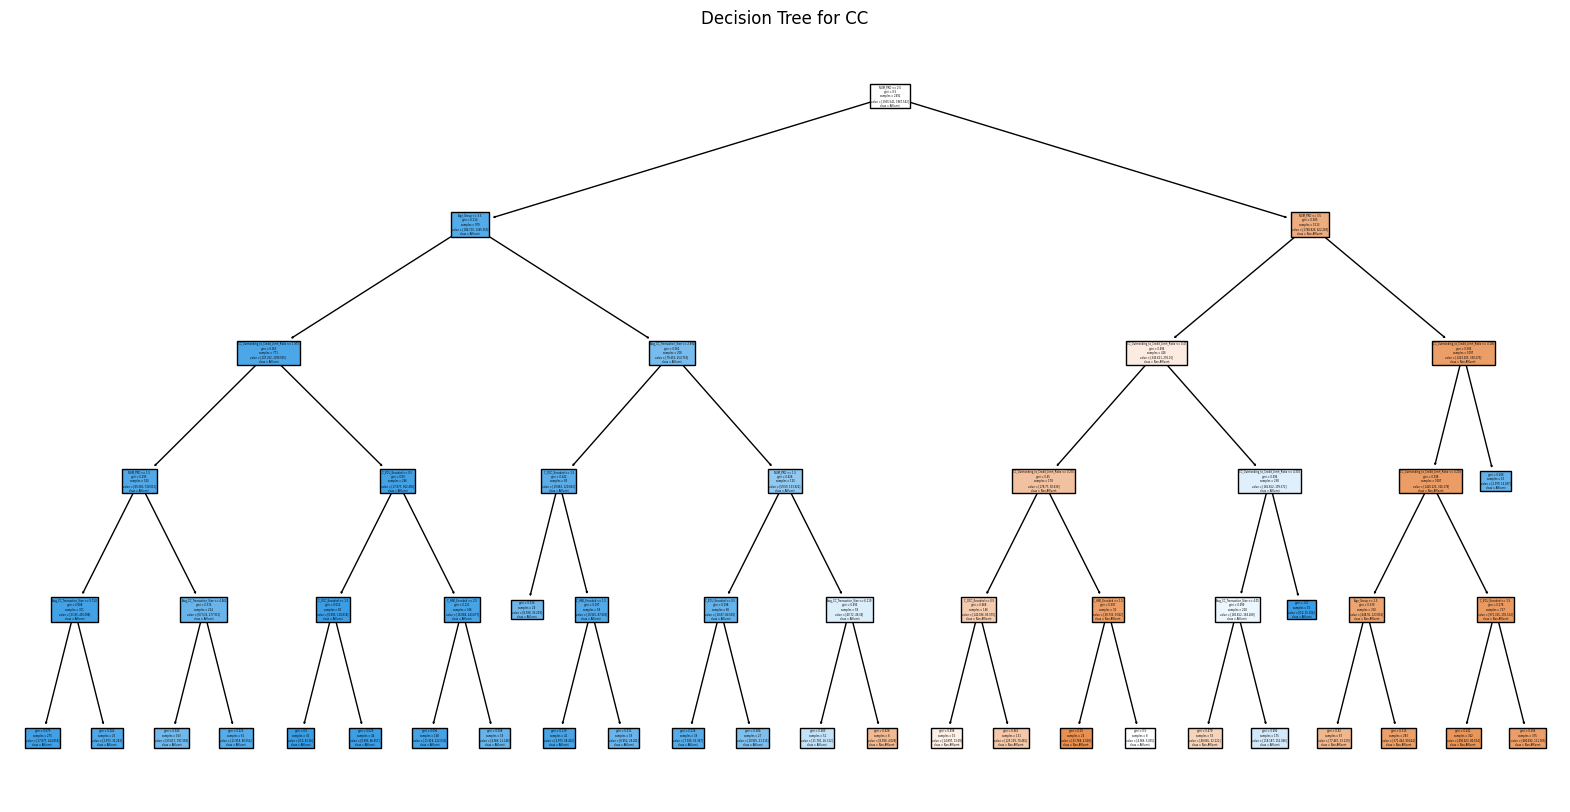

--------------------------------------------------
Product: LOAN
Classification Report on Test Set (Affluent Customers):
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       157
           1       0.87      0.70      0.78       147

    accuracy                           0.81       304
   macro avg       0.82      0.80      0.80       304
weighted avg       0.82      0.81      0.80       304



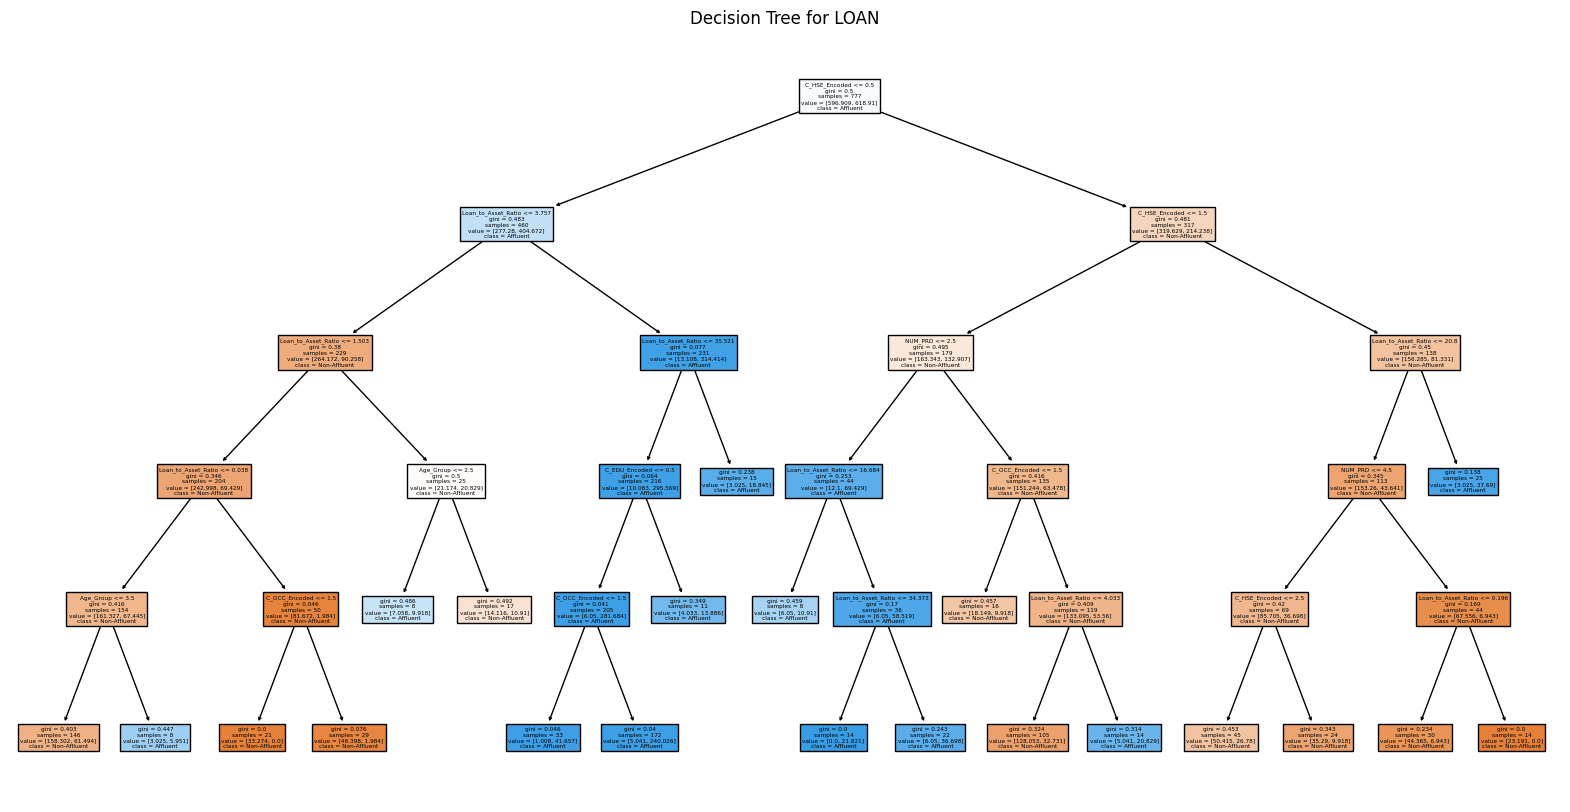

--------------------------------------------------
Product: FUNDS
Classification Report on Test Set (Affluent Customers):
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      2163
           1       0.82      0.79      0.81      2208

    accuracy                           0.81      4371
   macro avg       0.81      0.81      0.81      4371
weighted avg       0.81      0.81      0.81      4371



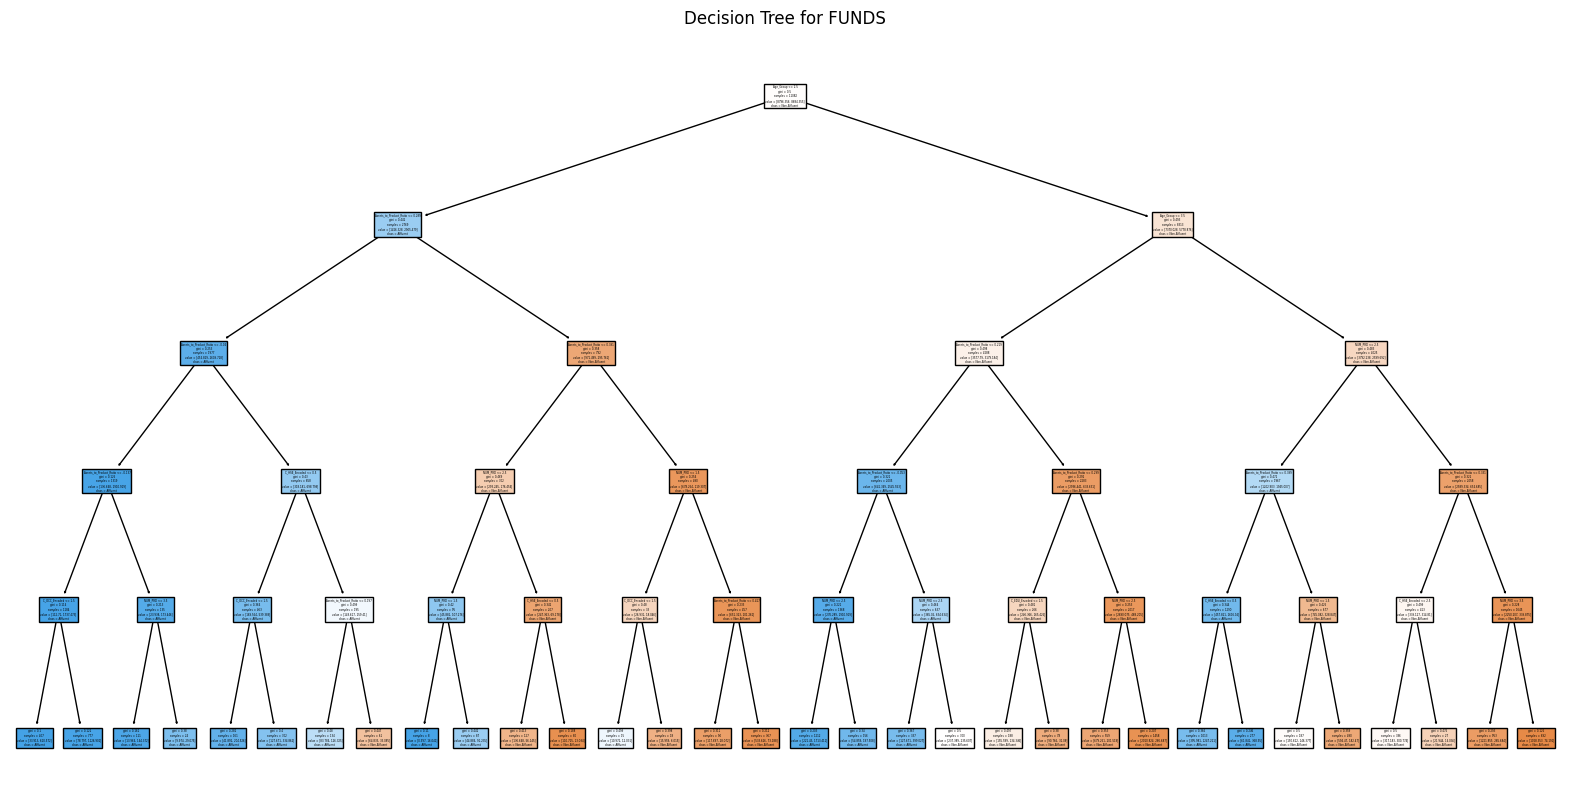

--------------------------------------------------


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

# Load the dataset

# Define product features
product_features = {
    'CASA': ['Total_CASA_Balance', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded', 'NUM_PRD'],
    'TD': ['Total_TD_Balance', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded', 'NUM_PRD'],
    'CC': ['Avg_CC_Transaction_Size', 'CC_Outstanding_to_Credit_Limit_Ratio', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded', 'NUM_PRD'],
    'LOAN': ['Loan_to_Asset_Ratio', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded', 'NUM_PRD'],
    'FUNDS': ['Assets_to_Product_Ratio', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded', 'NUM_PRD']
}

# Train tree-based classifier for each product
for product, features in product_features.items():
    print(f"Product: {product}")
    
    # Separate data for the current product
    product_data = data[data[f'IS_{product}'] == 1]
    
    # Select relevant features
    selected_features = features
    
    # Handle missing values and encode categorical variables if needed
    
    Affluent_data = product_data[product_data['C_seg']==0]
    Normal_data = product_data[product_data['C_seg']==1].sample(n=len(Affluent_data), random_state=42)

    #Create balanced product data
    product_data = pd.concat([Normal_data,Affluent_data])

    # Prepare data for modeling
    X = product_data[selected_features]
    y = product_data['C_seg']  # Target variable
    
    # Check if data is empty
    if len(X) == 0:
        print("No data available for modeling.")
        continue
    
    # # Split data into affluent and non-affluent customers
    # affluent_data = product_data[y == 0]
    # non_affluent_data = data[(data['C_seg'] == 1) & (data[f'IS_{product}'] == 0)]  
    non_affluent_data = data[(data['C_seg'] == 1)]  

    # Split affluent data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model on affluent customers with min leaf node and max depth
    clf = RandomForestClassifier(min_samples_leaf = 8,max_depth=5, class_weight='balanced' ,random_state=42)  # Using RandomForestClassifier with balanced class weights

    clf.fit(X_train, y_train)
    
    # Print classification report on test set
    print("Classification Report on Test Set (Affluent Customers):")
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    # Plot the decision tree
    plt.figure(figsize=(20,10))
    plot_tree(clf.estimators_[0], feature_names=selected_features, class_names=['Non-Affluent', 'Affluent'], filled=True)
    plt.title(f'Decision Tree for {product}')
    plt.show()
    
    # Apply the model on non-affluent customers who do not have the product
    X_non_affluent = non_affluent_data[selected_features]
    y_non_affluent_pred = clf.predict(X_non_affluent)
    
    # Print potential candidates for upclassing
    potential_candidates = non_affluent_data[y_non_affluent_pred == 0]
    # print("Potential Candidates for Upclassing:")
    # print(potential_candidates)

    #update potential_candidates in the data create additional column for this product type
    data[f'Potential_{product}_Candidates'] = 0
    data.loc[potential_candidates.index, f'Potential_{product}_Candidates'] = 1
    print("-" * 50)


In [9]:
product_features = ['CASA', 'TD', 'CC' , 'LOAN', 'FUNDS']

data['Potential_Product_Candidates'] = data[[f'Potential_{product}_Candidates' for product in product_features]].sum(axis=1)
pd.set_option('display.max_columns', None)
count = data[data['Potential_Product_Candidates'] > 0].shape[0]
print("Proposed Records which can be updated",count)
data[data['Potential_Product_Candidates']>0].head()


Proposed Records which can be updated 35722


,C_ID,IS_TD,IS_CASA,IS_FUNDS,IS_CC,IS_LOAN,Age_Group,C_EDU_Encoded,C_HSE_Encoded,C_OCC_Encoded,Total_CASA_Balance,Total_TD_Balance,Avg_CC_Transaction_Size,CC_Outstanding_to_Credit_Limit_Ratio,Assets_to_Product_Ratio,CASATD_Asset_Ratio,UT_Asset_Ratio,CC_Asset_Ratio,Loan_to_Asset_Ratio,NUM_PRD,C_seg,Potential_CASA_Candidates,Potential_TD_Candidates,Potential_CC_Candidates,Potential_LOAN_Candidates,Potential_FUNDS_Candidates,Potential_Product_Candidates
10927,1186,1,1,1,0,0,3,0,0,0,0.634758,12.254868,0.000000,0.000000,0.464649,1.321928e+00,0.0,0.000000,0.0,3,1,1,1,1,1,1,5
10928,1353,1,1,1,0,0,4,0,0,0,0.673160,13.199326,0.000000,0.000000,0.607151,2.169925e+00,0.0,0.000000,0.0,2,1,1,1,0,1,1,4
10929,1563,1,1,1,0,0,4,0,0,1,0.562603,0.000000,0.000000,0.000000,0.565046,1.265353e-13,0.0,0.000000,0.0,1,1,1,0,0,0,1,2
10931,1722,1,1,1,0,0,4,2,3,0,-0.699457,0.000000,0.000000,0.000000,-0.660178,-1.000000e+00,0.0,0.000000,0.0,1,1,0,0,0,1,0,1
10932,1748,1,1,1,1,0,3,2,1,2,0.374299,0.000000,6.031886,1.141033,0.265600,1.233319e-13,0.0,0.131028,0.0,3,1,1,1,1,1,1,5


In [10]:
data[data['C_ID']==1563]

,C_ID,IS_TD,IS_CASA,IS_FUNDS,IS_CC,IS_LOAN,Age_Group,C_EDU_Encoded,C_HSE_Encoded,C_OCC_Encoded,Total_CASA_Balance,Total_TD_Balance,Avg_CC_Transaction_Size,CC_Outstanding_to_Credit_Limit_Ratio,Assets_to_Product_Ratio,CASATD_Asset_Ratio,UT_Asset_Ratio,CC_Asset_Ratio,Loan_to_Asset_Ratio,NUM_PRD,C_seg,Potential_CASA_Candidates,Potential_TD_Candidates,Potential_CC_Candidates,Potential_LOAN_Candidates,Potential_FUNDS_Candidates,Potential_Product_Candidates
10929,1563,1,1,1,0,0,4,0,0,1,0.562603,0.000000,0.0,0.000000,0.565046,1.265353e-13,0.0,0.0,0.0,1,1,1,0,0,0,1,2
20792,1563,1,1,1,0,0,4,0,0,1,0.236494,12.232291,0.0,0.000000,0.492511,1.584951e+00,0.0,0.0,0.0,2,1,0,1,0,1,1,3
26460,1563,1,1,1,1,1,3,3,0,2,0.301109,0.000000,0.0,0.029559,0.164023,1.194878e-13,0.0,0.0,0.0,4,1,1,1,1,1,1,5


In [12]:
#Show any duplicate records based on C_ID
data[data.duplicated(subset=['C_ID'], keep=False)].sort_values('C_ID')

,C_ID,IS_TD,IS_CASA,IS_FUNDS,IS_CC,IS_LOAN,Age_Group,C_EDU_Encoded,C_HSE_Encoded,C_OCC_Encoded,Total_CASA_Balance,Total_TD_Balance,Avg_CC_Transaction_Size,CC_Outstanding_to_Credit_Limit_Ratio,Assets_to_Product_Ratio,CASATD_Asset_Ratio,UT_Asset_Ratio,CC_Asset_Ratio,Loan_to_Asset_Ratio,NUM_PRD,C_seg,Potential_CASA_Candidates,Potential_TD_Candidates,Potential_CC_Candidates,Potential_LOAN_Candidates,Potential_FUNDS_Candidates,Potential_Product_Candidates
7920,0,1,1,1,0,0,4,0,0,0,0.446067,0.000000,0.000000,0.000000,0.378316,1.250938e-13,0.000000,0.000000,0.000000,2,0,0,0,0,0,0,0
44084,0,1,1,1,0,1,2,0,0,2,-0.699457,0.000000,0.000000,0.000000,-0.660178,-1.000000e+00,0.000000,0.000000,33.690144,1,1,0,0,0,0,0,0
34921,11,1,1,1,0,0,4,0,1,1,0.520300,11.289794,0.000000,0.000000,0.395870,2.108444e-01,0.515878,0.000000,0.000000,4,1,1,1,1,1,1,5
31864,11,1,1,1,1,0,4,3,3,2,0.478954,0.000000,3.740254,0.131028,0.410243,1.257345e-13,0.000000,0.039221,0.000000,2,1,1,0,0,1,1,3
40449,19,1,1,1,1,0,2,2,1,2,-0.699457,0.000000,4.682003,2.409644,-0.660178,-1.000000e+00,0.000000,33.073828,0.000000,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44077,99900,1,1,1,0,1,2,0,0,2,-0.699457,0.000000,0.000000,0.000000,-0.660178,-1.000000e+00,0.000000,0.000000,33.940939,1,1,0,0,0,0,0,0
40445,99920,1,1,1,0,0,1,0,0,1,-0.699457,0.000000,0.000000,0.000000,-0.660178,-1.000000e+00,0.000000,0.000000,0.000000,1,1,0,0,0,0,0,0
9700,99920,1,1,1,0,0,4,0,0,1,0.363793,12.388398,0.000000,0.000000,0.429043,1.000000e+00,0.000000,0.000000,0.000000,3,0,0,0,0,0,0,0
7919,99931,1,1,1,0,0,2,3,0,2,0.365103,0.000000,0.000000,0.000000,0.299719,1.230116e-13,0.000000,0.000000,0.000000,2,0,0,0,0,0,0,0
